<a href="https://colab.research.google.com/github/nehal3589/heart/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# To rename the column names, use .rename(columns = {'oldname' : 'newname'}
heart = heart.rename(
                columns = {'cp':'chest_pain_type',
                           'trestbps':'resting_blood_pressure',
                           'chol': 'cholesterol',
                           'fbs': 'fasting_blood_sugar',
                           'restecg' : 'resting_electrocardiogram',
                           'thalach': 'max_heart_rate_achieved',
                           'exang': 'exercise_induced_angina',
                           'oldpeak': 'st_depression',
                           'slope': 'st_slope',
                           'ca':'num_major_vessels',
                           'thal': 'thalassemia'}
                    )

In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_electrocardiogram,0
max_heart_rate_achieved,0
exercise_induced_angina,0
st_depression,0


Accuracy: 0.855457227138643
F1 Score: 0.856033653781039


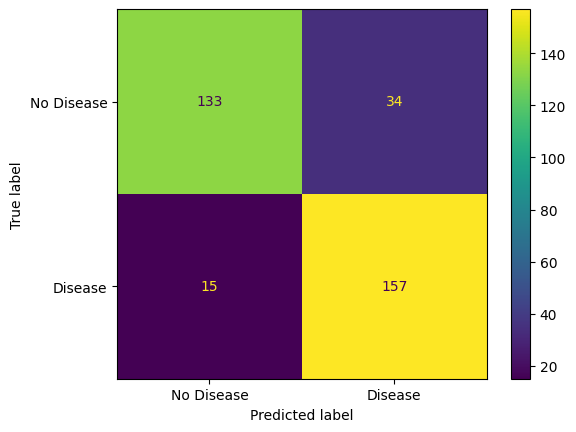

In [ ]:
X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

labels = ["No Disease", "Disease"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Define features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions with LDA
y_pred_lda = lda.predict(X_test)

# Evaluate the LDA model
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions with QDA
y_pred_qda = qda.predict(X_test)

# Evaluate the QDA model
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("QDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
LDA Accuracy: 0.814935064935065
LDA Confusion Matrix:
 [[117  42]
 [ 15 134]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.80       159
           1       0.76      0.90      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
wei

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تحميل البيانات
df = pd.read_csv('heart.csv')

# عرض أول 5 صفوف من البيانات للتأكد
print(df.head())

# تحديد الميزات والهدف
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

X = df[features]
y = df[target]

# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# إنشاء وتدريب نموذج LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# التنبؤ باستخدام نموذج LDA
y_pred_lda = lda.predict(X_test)

# تقييم نموذج LDA
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

# إنشاء وتدريب نموذج QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# التنبؤ باستخدام نموذج QDA
y_pred_qda = qda.predict(X_test)

# تقييم نموذج QDA
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("QDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
LDA Accuracy: 0.814935064935065
LDA Confusion Matrix:
 [[117  42]
 [ 15 134]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.80       159
           1       0.76      0.90      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
wei

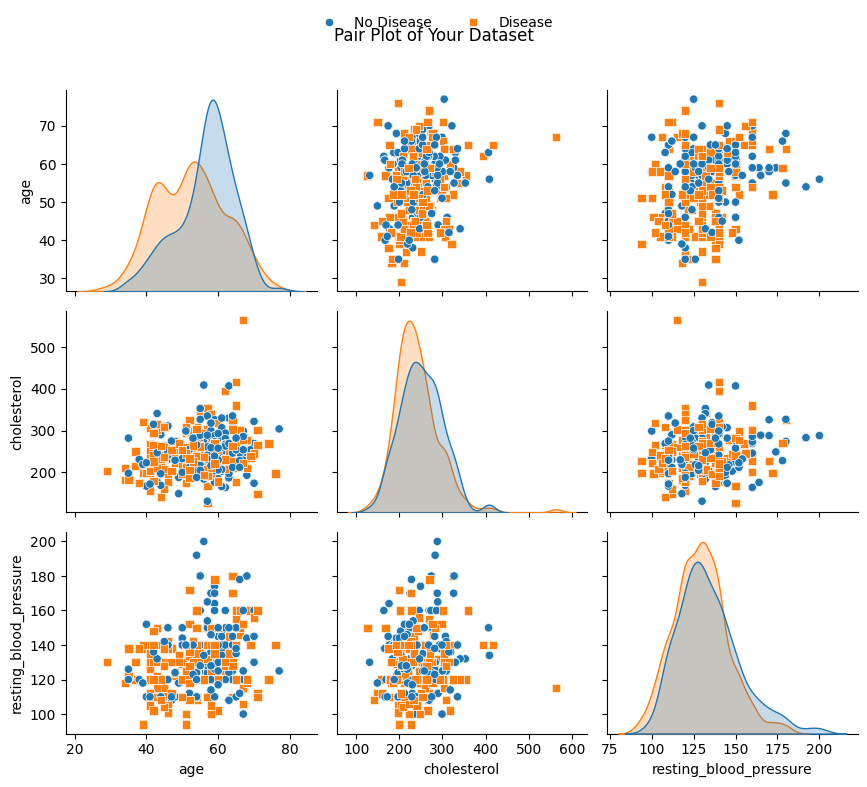

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# تعيين الأعمدة كميزات وفئة
features = ['age', 'cholesterol', 'resting_blood_pressure']  # اختر الأعمدة التي تريد تضمينها في pair plot
target = 'target'

# التأكد من وجود عمود الفئات
if target not in heart.columns:
    raise ValueError(f"العمود {target} غير موجود في البيانات")

# تحويل القيم الرقمية للفئات إلى أسماء الفئات (اختياري)
# إذا كان لديك فئات رقمية وتريد تحويلها إلى أسماء نصية
heart[target] = heart[target].map({0: 'No Disease', 1: 'Disease'})  # قم بتعديل القيم حسب بياناتك

# إنشاء pair plot لرؤية العلاقات بين الميزات المختلفة
ax = sns.pairplot(heart, vars=features, hue=target, markers=["o", "s"])
plt.suptitle("Pair Plot of Your Dataset", y=1.02)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False)
plt.tight_layout()
plt.show()


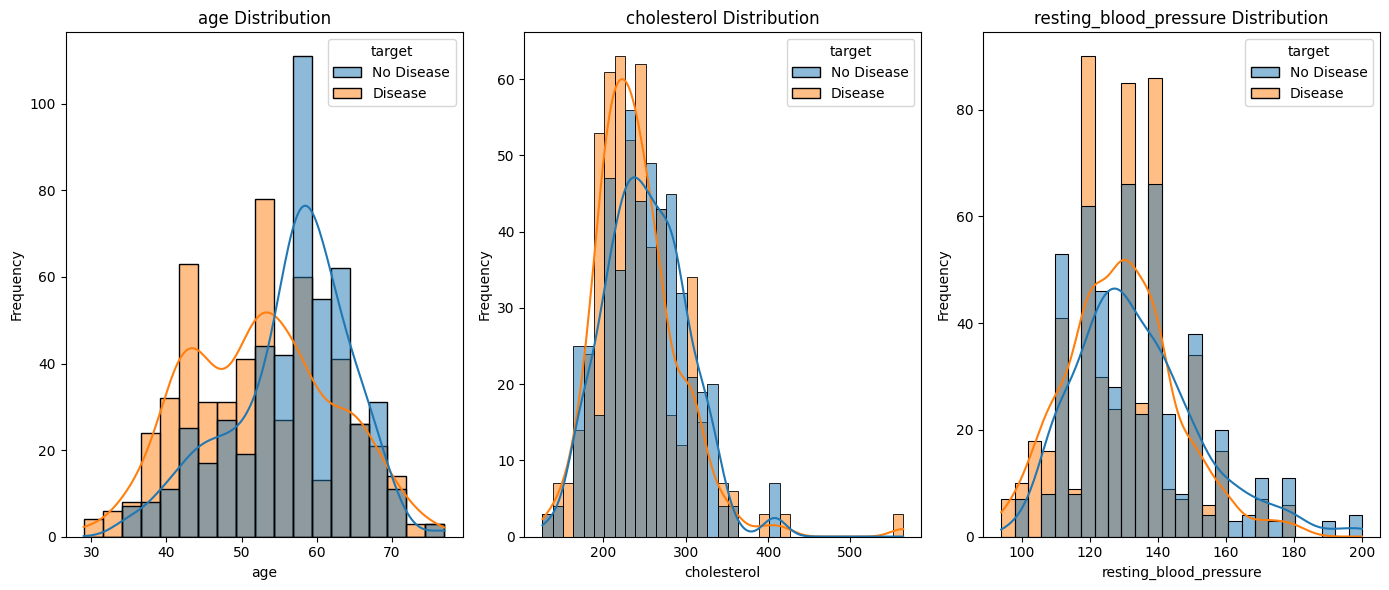

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# تحميل البيانات من ملف CSV

# تعيين الأعمدة التي تريد عرض توزيعها
features = ['age', 'cholesterol', 'resting_blood_pressure']
target = 'target'

# التأكد من وجود عمود الفئات
if target not in heart.columns:
    raise ValueError(f"العمود {target} غير موجود في البيانات")

# التأكد من وجود الأعمدة المميزة
for feature in features:
    if feature not in heart.columns:
        raise ValueError(f"العمود {feature} غير موجود في البيانات")

# تحويل القيم الرقمية للفئات إلى أسماء الفئات (اختياري)
heart[target] = heart[target].map({0: 'No Disease', 1: 'Disease'})  # قم بتعديل القيم حسب بياناتك

# معالجة القيم المفقودة
heart = heart.dropna(subset=features + [target])  # إزالة الصفوف التي تحتوي على قيم مفقودة في الأعمدة ذات الصلة

# إعداد رسم الهيستوجرامات
plt.figure(figsize=(14, 6))  # تغيير الحجم وفقًا لعدد الميزات

# رسم هيستوجرامات لكل ميزة
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)  # عدد الصفوف والأعمدة يعتمد على عدد الميزات
    sns.histplot(data=heart, x=feature, hue=target, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


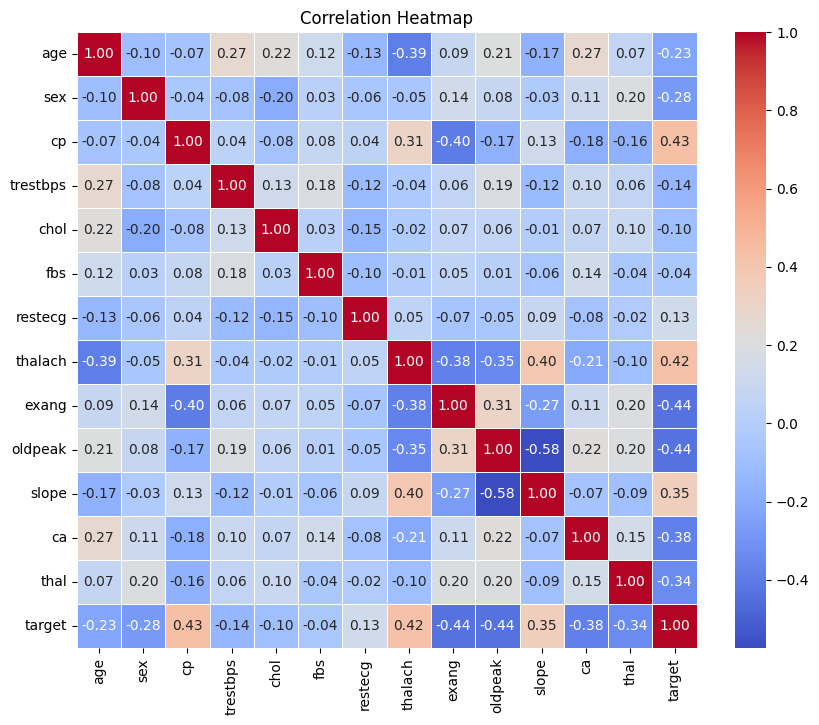

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# تحميل البيانات من ملف CSV
heart = pd.read_csv('/content/heart.csv')  # استبدل 'your_dataset.csv' باسم ملفك

# حساب مصفوفة التآزر
correlation_matrix = heart.corr(numeric_only=True)

# رسم خريطة الحرارة للتآزر
plt.figure(figsize=(10, 8))  # يمكنك تعديل الحجم حسب الحاجة
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

